## 0.1 Import Libraries and Data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating a folder path

path = r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/'

In [4]:
path

'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/'

In [5]:
# Import Data
df = pd.read_csv(os.path.join(path, 'Prepared Data/All_years_happiness.csv'))

## 0.2 Data Checks and cleaning

In [6]:
df.shape

(782, 11)

In [7]:
df.head()

,Country,Years,Year country combined,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,2015,"Switzerland, 2015",1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2015,"Iceland, 2015",2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,2015,"Denmark, 2015",3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,2015,"Norway, 2015",4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,2015,"Canada, 2015",5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [8]:
# drop non-numeric columns from the dataset to perform K-means algorithm

df=df.drop(columns=['Country','Years','Year country combined','Happiness Rank'])

In [9]:
df.head()

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [11]:
# Renaming Columns for ease

df.rename(columns = {'Economy (GDP per Capita)' : 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }, inplace = True)

In [15]:
df.isnull()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
777,False,False,False,False,False,False,False
778,False,False,False,False,False,False,False
779,False,False,False,False,False,False,False
780,False,False,False,False,False,False,False


In [16]:
df.columns[df.isna().any()]

Index(['Trust'], dtype='object')

In [22]:
df = df.dropna()

In [23]:
# print("DataFrame after removing rows with NaN values:")
print(df)

     Happiness Score  Economy   Family   Health  Freedom    Trust  Generosity
0              7.587  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678
1              7.561  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630
2              7.527  1.32548  1.36058  0.87464  0.64938  0.48357     0.34139
3              7.522  1.45900  1.33095  0.88521  0.66973  0.36503     0.34699
4              7.427  1.32629  1.32261  0.90563  0.63297  0.32957     0.45811
..               ...      ...      ...      ...      ...      ...         ...
777            3.334  0.35900  0.71100  0.61400  0.55500  0.41100     0.21700
778            3.231  0.47600  0.88500  0.49900  0.41700  0.14700     0.27600
779            3.203  0.35000  0.51700  0.36100  0.00000  0.02500     0.15800
780            3.083  0.02600  0.00000  0.10500  0.22500  0.03500     0.23500
781            2.853  0.30600  0.57500  0.29500  0.01000  0.09100     0.20200

[781 rows x 7 columns]


##  0.3 The elbow technique

In [24]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [25]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

/Users/Ben/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Ben/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Ben/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Ben/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/Ben/anaconda3/lib/pyt

In [26]:
score

[-1290.5537117753554,
 -487.6368620712159,
 -305.99183656799846,
 -236.5289713873646,
 -193.57893186994107,
 -176.1736382479392,
 -161.928734126206,
 -151.08945773761067,
 -144.2959064446826]

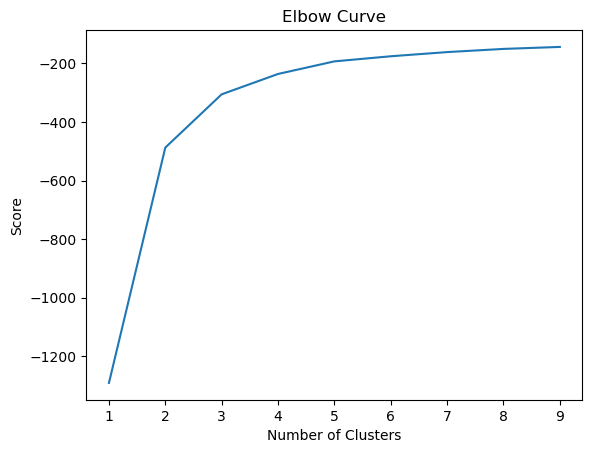

In [27]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [28]:
# Above, there's a  jump to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for clusters is three.

## Step 4 K-means Clustering

In [29]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [30]:
# Fit the k-means object to the data.

kmeans.fit(df)

/Users/Ben/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [31]:
df['clusters'] = kmeans.fit_predict(df)

/Users/Ben/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_20686/1645658811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clusters'] = kmeans.fit_predict(df)


In [32]:
df.head()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,clusters
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [33]:
df['clusters'].value_counts()

clusters
1    308
2    278
0    195
Name: count, dtype: int64

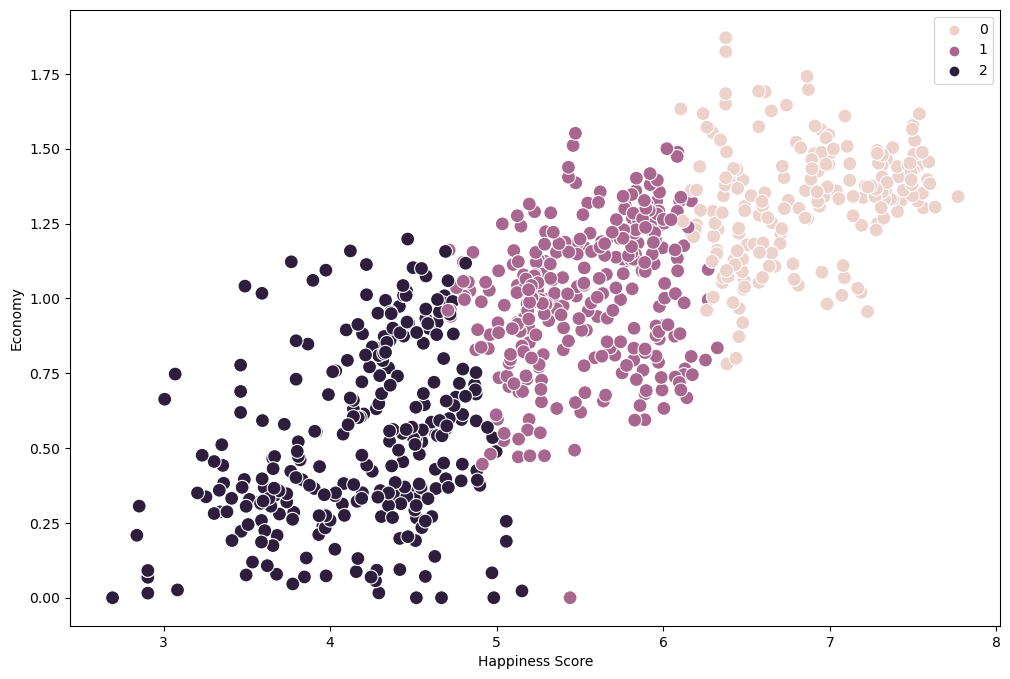

In [34]:
# Plot the clusters for the "Happiness Score" and "Economy" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Happiness Score'], y=df['Economy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Economy') # Label y-axis.
plt.show()

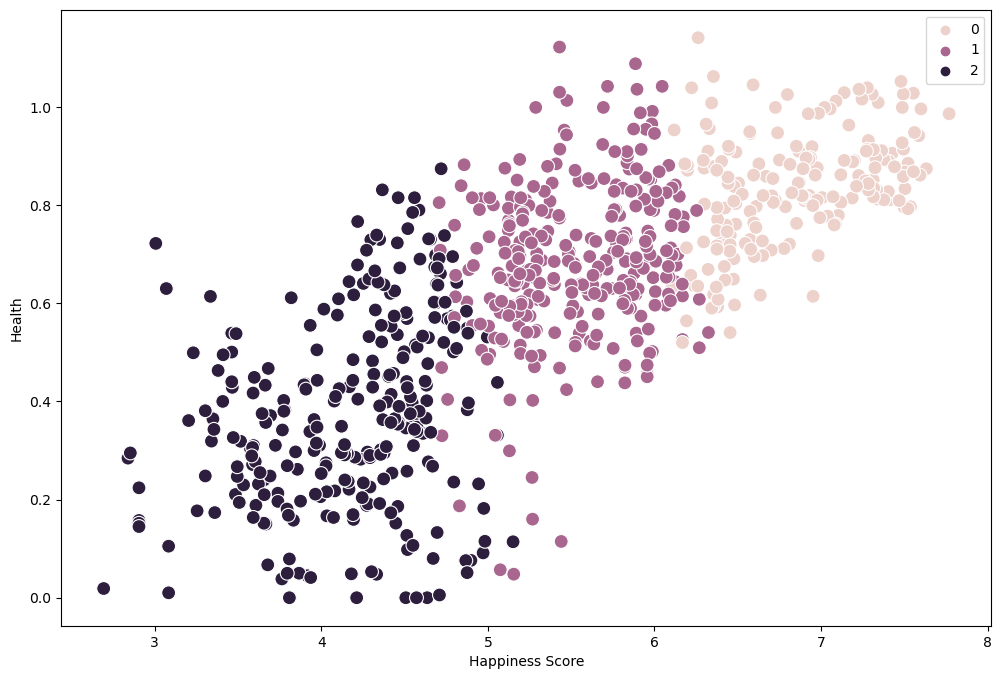

In [36]:
# Plot the clusters for the "Happiness Score" and "Health" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Happiness Score'], y=df['Health'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Health') # Label y-axis.
plt.show()

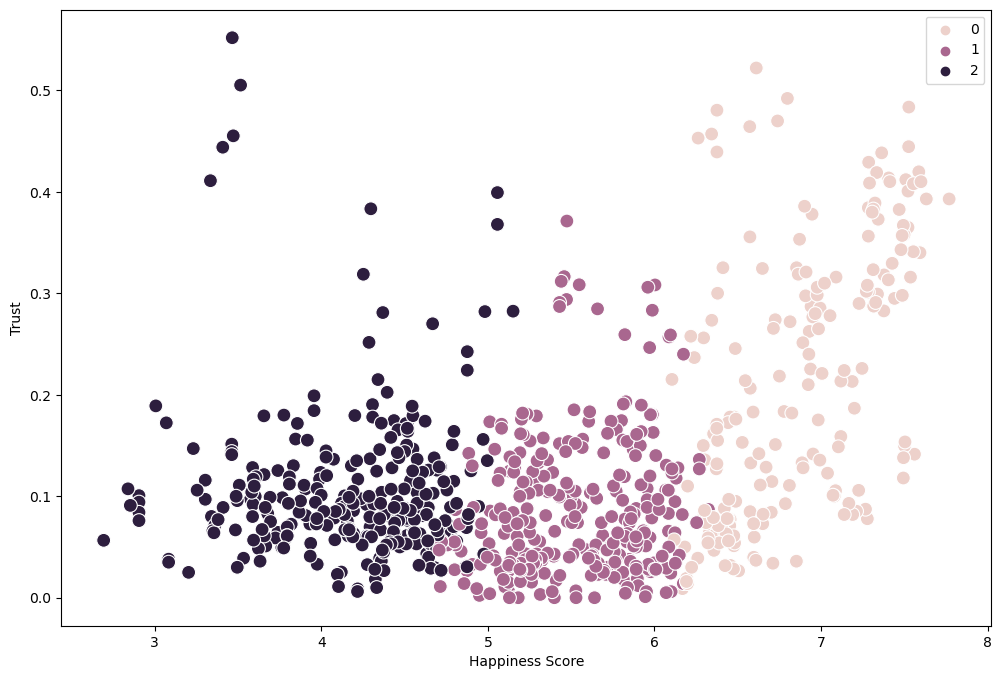

In [39]:
# Plot the clusters for the "Happiness Score" and "Trust" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Happiness Score'], y=df['Trust'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Trust') # Label y-axis.
plt.show()

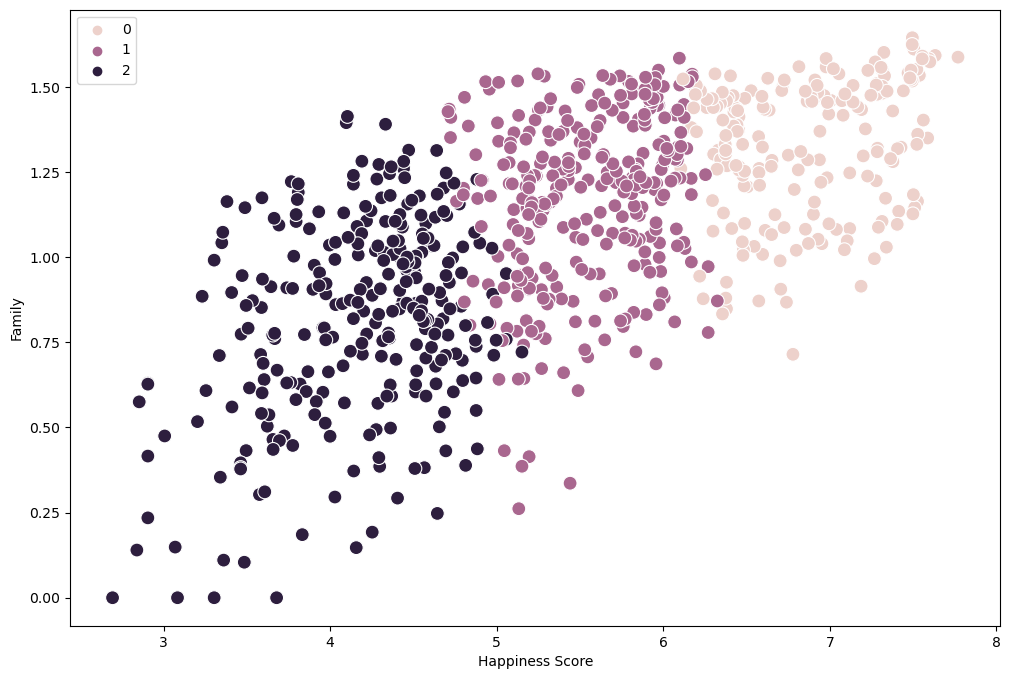

In [40]:
# Plot the clusters for the "Happiness Score" and "Family" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Happiness Score'], y=df['Family'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Happiness Score') # Label x-axis.
plt.ylabel('Family') # Label y-axis.
plt.show()

#### Happiness Score vs Economy:
#### The clusters in this scatter make sense. The centre area (purple) appears the most concentrated with many overlapping points, potentially containing Country/Years within a small range. Conversely, I can also see that Economy pink cluster has the smallest difference between the mean and median values: 1.33 and 1.34.

#### Happiness Score vs Health
#### I saw quite a similar trend with clusters when looking at Health which wasn't surprising. The pink and purple clusters were the most similar in terms of median and mean values, while the dark purple has only minimal differences. 

#### Happiness Score vs Trust
#### This was the most surprising, visually, to see the breakdown of clusters and the many outliers. However it shows something I have already seen previously in the data: Trust in Government generally remains quite low, even when Happiness Score increases, therefore there is not a strong correlation (or as strong as the other variables I am investigating here. 

#### Happiness Score vs Family
#### Here, we can again see similar patterns in the clusters and general scatter graph: The mean and median values are quite similar, especially in the pink and dark purple clusters and we can see a concentrated area in the purple cluster, while the pink is a lot more disparate. 

In [41]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

/tmp/ipykernel_20686/4155924145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'


In [42]:
df.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'Family':['mean', 'median'], 
                         'Economy':['mean', 'median'],
                          'Trust':['mean', 'median'],
                          'Health':['mean', 'median']})

Happiness Score           Family             Economy            \
                       mean median      mean    median      mean    median   
cluster                                                                      
dark purple        4.168288  4.286  0.812401  0.847915  0.518708  0.471775   
pink               6.849451  6.852  1.323752  1.369000  1.330339  1.343000   
purple             5.536334  5.525  1.164116  1.208447  1.008559  1.024820   

                Trust             Health            
                 mean   median      mean    median  
cluster                                             
dark purple  0.106609  0.08842  0.376685  0.359870  
pink         0.214521  0.18676  0.834437  0.838404  
purple       0.086027  0.07149  0.684433  0.684500

In [43]:
df.head()

,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity,clusters,cluster
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0,pink
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0,pink
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0,pink
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0,pink
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0,pink


#### These results could be useful in future steps of an analysis pipeline, and whether they effectively capture meaningful subgroups within the World Happiness Report data. It's very likely that the current clustering needs refining based on the insights that will be uncovered from a more comprehensive analysis. However, as we can see that the data points within a cluster do not deviate from the cluster's mean or median, it could indicate the algorithm hs correctly identified these clusters.